In [3]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import unicodedata
import en_core_web_sm
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from textblob import TextBlob
import random
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import gensim
from gensim.models import Word2Vec
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, metrics, model_selection, svm
import joblib as joblib
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB  
from xgboost import XGBClassifier
from gensim.models.fasttext import FastText
from IPython import display 
from sklearn.manifold import TSNE

In [4]:
df=pd.read_csv('C:/Users/anagha.bhople/Desktop/Sentiment Analysis/preprocess_womens_clothing_reviews.csv')

In [5]:
df.head(2)

,Unnamed: 0,index,Review Text,Rating,Recommended IND,Positive Feedback Count,Review Text Precrocessed,Label,Label_3C,Review Text no Stopwords,tokenized_text
0,0,0,Absolutely wonderful - silky and sexy and comf...,4,1,0,absolutely wonderful silk and sex and comfortable,1,1,absolutely wonderful silk sex comfortable,"['absolutely', 'wonderful', 'silk', 'sex', 'co..."
1,1,1,Love this dress! it's sooo pretty. i happene...,5,1,4,love this dress -PRON- is soon pretty i happen...,1,1,love dress soon pretty happen find store am gl...,"['love', 'dress', 'soon', 'pretty', 'happen', ..."


In [6]:
X, y = df['Review Text no Stopwords'], df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
def tokenize(x):
    x= TextBlob(str(x)).words
    return x

In [8]:
def evaluation(y_test, y_pred, X_test, pipeline):
    print("model score: %.3f" % pipeline.score(X_test, y_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    Accuracy_score = accuracy_score(y_test, y_pred)
    print('Accuracy Score: {}'.format(Accuracy_score))
    F1_score = f1_score(y_test, y_pred)
    print('F1 Score: {}'.format(F1_score))
    Average_precision = average_precision_score(y_test, y_pred)
    print('Average precision-recall score: {}'.format(Average_precision))
    metrics.plot_roc_curve(pipeline, X_test, y_test)  
    plt.show()

In [6]:
def compare_classifiers(f1score):
    name =  [
    'LogisticRegression',
    'MultinomialNB',
    'svm.SVC',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'AdaBoostClassifier',
    'GradientBoostingClassifier',
    'XGBClassifier'
    ]
  
    # Figure Size 
    fig, ax = plt.subplots(figsize =(10, 5)) 

    # Horizontal Bar Plot 
    ax.barh(name, f1score) 

    # Remove axes splines 
    for s in ['top', 'bottom', 'left', 'right']: 
        ax.spines[s].set_visible(False) 

    # Remove x, y Ticks 
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 

    # Add padding between axes and labels 
    ax.xaxis.set_tick_params(pad = 5) 
    ax.yaxis.set_tick_params(pad = 10) 

    # Add x, y gridlines 
    ax.grid(b = True, color ='black', 
            linestyle ='-.', linewidth = 0.5, 
            alpha = 0.2) 

    # Show top values  
    ax.invert_yaxis() 

    # Add annotation to bars 
    for i in ax.patches: 
        plt.text(i.get_width()+0.1, i.get_y()+0.2,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 10, fontweight ='bold', 
                 color ='grey') 

    # Add Plot Title 
    ax.set_title('Comparision of Different classifiers in terms of F1 Score', 
                 loc ='left', ) 

    # Show Plot 
    plt.show() 

In [7]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [67]:
def threeD_plot(similar_words):
    fig = plt.figure()

    ## pca to reduce dimensionality from 300 to 3
    words = sum([[k] + v for k, v in similar_words.items()], [])
    wvs = model.wv[words]

    pca = TSNE(perplexity=40, n_components=3, init='pca')
    X = pca.fit_transform(wvs)

    ## create dtf
    dtf_ = pd.DataFrame(X, index=words, columns=["x","y","z"])
    dtf_["input"] = 0

    ## plot 3d
    from mpl_toolkits.mplot3d import Axes3D

    fig1=plt.figure(figsize=(8,8))
    ax = fig1.add_subplot(111, projection='3d')
    ax.scatter(dtf_[dtf_["input"]==0]['x'], 
               dtf_[dtf_["input"]==0]['y'], 
               dtf_[dtf_["input"]==0]['z'], c="black")
    ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
           yticklabels=[], zticklabels=[])

    for label, row in dtf_[["x","y","z"]].iterrows():
        x, y, z = row
        ax.text(x, y, z, s=label)

In [233]:
def pca_plot(unique_words):
    from sklearn.decomposition import PCA
    
    words=unique_words
    wvs = model.wv[words]
    
    #words = model.wv.index2word
    #wvs = model.wv[words]

    pca = PCA(n_components=2)
    np.set_printoptions(suppress=True)
    P = pca.fit_transform(wvs)
    labels = words

    plt.figure(figsize=(20, 8))
    plt.scatter(P[:, 0], P[:, 1], c='red', edgecolors='g')
    for label, x, y in zip(labels, P[:, 0], P[:, 1]):
        plt.annotate(label, xy=(x+0.08, y+0.05), xytext=(0, 0), textcoords='offset points')

In [66]:
def similar_word_represent(similar_words):
    words = sum([[k] + v for k, v in similar_words.items()], [])
    wvs = model.wv[words]

    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(wvs)
    labels = words

    plt.figure(figsize=(14, 8))
    plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# TFIDF

In [247]:
tfidf=TfidfVectorizer(tokenizer= tokenize, ngram_range=(1, 2), max_df=0.9, min_df=3, sublinear_tf=True)

LogisticRegression()
model score: 0.876
[[ 722  549]
 [ 152 4238]]
              precision    recall  f1-score   support

           0       0.83      0.57      0.67      1271
           1       0.89      0.97      0.92      4390

    accuracy                           0.88      5661
   macro avg       0.86      0.77      0.80      5661
weighted avg       0.87      0.88      0.87      5661

Accuracy Score: 0.8761702879349939
F1 Score: 0.9236133812792852
Average precision-recall score: 0.8815115183249703


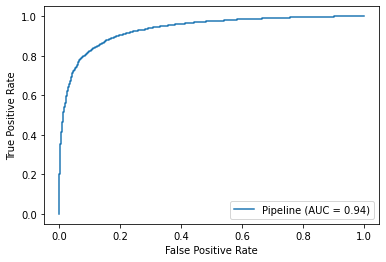

MultinomialNB()
model score: 0.796
[[ 120 1151]
 [   5 4385]]
              precision    recall  f1-score   support

           0       0.96      0.09      0.17      1271
           1       0.79      1.00      0.88      4390

    accuracy                           0.80      5661
   macro avg       0.88      0.55      0.53      5661
weighted avg       0.83      0.80      0.72      5661

Accuracy Score: 0.7957957957957958
F1 Score: 0.8835381825508765
Average precision-recall score: 0.7920692359535135


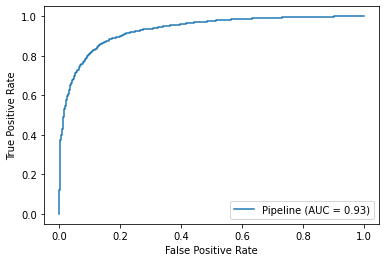

SVC()
model score: 0.884
[[ 774  497]
 [ 157 4233]]
              precision    recall  f1-score   support

           0       0.83      0.61      0.70      1271
           1       0.89      0.96      0.93      4390

    accuracy                           0.88      5661
   macro avg       0.86      0.79      0.82      5661
weighted avg       0.88      0.88      0.88      5661

Accuracy Score: 0.8844727080021197
F1 Score: 0.9282894736842104
Average precision-recall score: 0.890654293850122


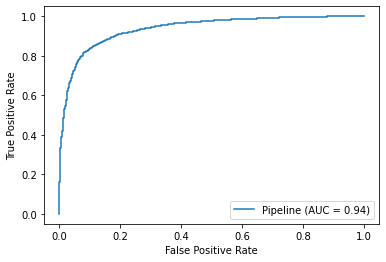

DecisionTreeClassifier()
model score: 0.790
[[ 702  569]
 [ 619 3771]]
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      1271
           1       0.87      0.86      0.86      4390

    accuracy                           0.79      5661
   macro avg       0.70      0.71      0.70      5661
weighted avg       0.79      0.79      0.79      5661

Accuracy Score: 0.7901430842607313
F1 Score: 0.8639175257731958
Average precision-recall score: 0.8557226134160301


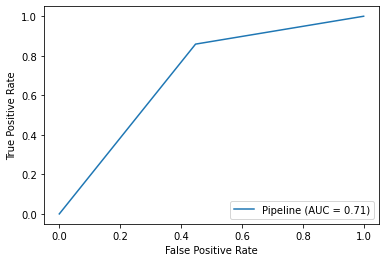

RandomForestClassifier()
model score: 0.842
[[ 452  819]
 [  78 4312]]
              precision    recall  f1-score   support

           0       0.85      0.36      0.50      1271
           1       0.84      0.98      0.91      4390

    accuracy                           0.84      5661
   macro avg       0.85      0.67      0.70      5661
weighted avg       0.84      0.84      0.82      5661

Accuracy Score: 0.8415474297827239
F1 Score: 0.9057872072261317
Average precision-recall score: 0.8392288599257075


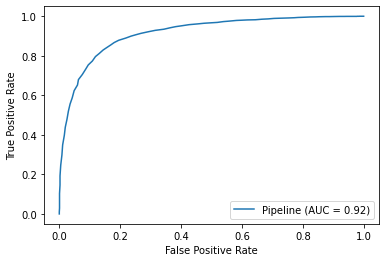

AdaBoostClassifier()
model score: 0.840
[[ 693  578]
 [ 328 4062]]
              precision    recall  f1-score   support

           0       0.68      0.55      0.60      1271
           1       0.88      0.93      0.90      4390

    accuracy                           0.84      5661
   macro avg       0.78      0.74      0.75      5661
weighted avg       0.83      0.84      0.83      5661

Accuracy Score: 0.839957604663487
F1 Score: 0.8996677740863789
Average precision-recall score: 0.8679632686487538


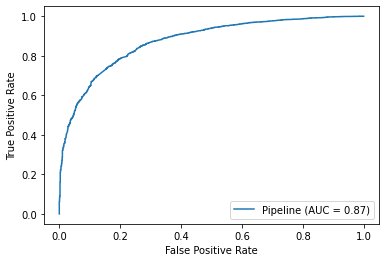

GradientBoostingClassifier()
model score: 0.844
[[ 534  737]
 [ 145 4245]]
              precision    recall  f1-score   support

           0       0.79      0.42      0.55      1271
           1       0.85      0.97      0.91      4390

    accuracy                           0.84      5661
   macro avg       0.82      0.69      0.73      5661
weighted avg       0.84      0.84      0.83      5661

Accuracy Score: 0.8441971383147854
F1 Score: 0.9058898847631243
Average precision-recall score: 0.8495378342596115


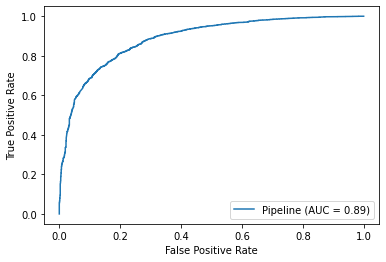

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


C:\Users\anagha.bhople\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model score: 0.869
[[ 761  510]
 [ 230 4160]]
              precision    recall  f1-score   support

           0       0.77      0.60      0.67      1271
           1       0.89      0.95      0.92      4390

    accuracy                           0.87      5661
   macro avg       0.83      0.77      0.80      5661
weighted avg       0.86      0.87      0.86      5661

Accuracy Score: 0.869281045751634
F1 Score: 0.9183222958057395
Average precision-recall score: 0.8847509442214915


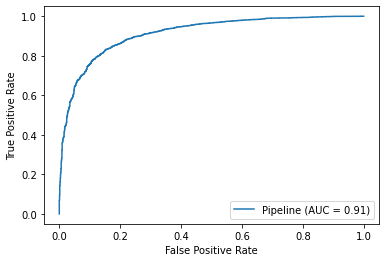

In [9]:
classifiers = [
    LogisticRegression(),
    MultinomialNB(),
    svm.SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]
f1=[]
for classifier in classifiers:
    print(classifier)
    sentiment_pipe = Pipeline(steps=[('preprocessor', tfidf),
                      ('classifier', classifier)])
    sentiment_pipe.fit(X_train, y_train)   
    
    y_pred = sentiment_pipe.predict(X_test)
    F1 = f1_score(y_test, y_pred)
    f1.append(F1)
    evaluation(y_test, y_pred, X_test, sentiment_pipe)

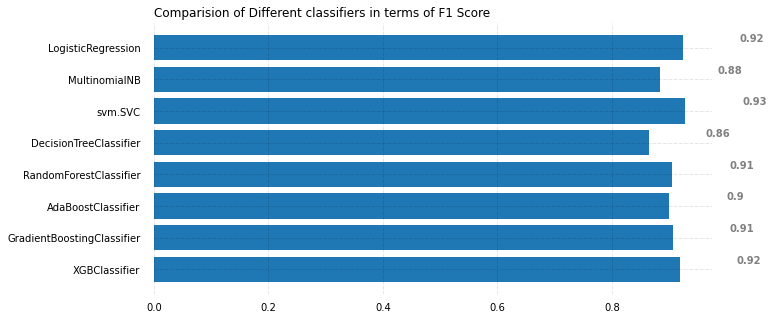

In [22]:
compare_classifiers(f1)

In [9]:
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

Log = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 

SVC = [{'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

RF = [{'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

params_dict = {0: Log, 1: SVC, 2: RF}

grid_dict = {0: 'Logistic Regression', 
             1: 'Support Vector Machine',
             2: 'Random Forest Classifier'}

best_acc = 0.0
best_clf = 0
best_gs = ''

LogisticRegression()

Estimator: [{'clf__penalty': ['l1', 'l2'], 'clf__C': [1.0, 0.5], 'clf__solver': ['liblinear']}]
Best params are : {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.873
model score: 0.844
[[ 788  483]
 [ 222 4168]]
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      1271
           1       0.90      0.95      0.92      4390

    accuracy                           0.88      5661
   macro avg       0.84      0.78      0.81      5661
weighted avg       0.87      0.88      0.87      5661

Accuracy Score: 0.8754636989931107
F1 Score: 0.9220219002322751
Average precision-recall score: 0.890049146539013


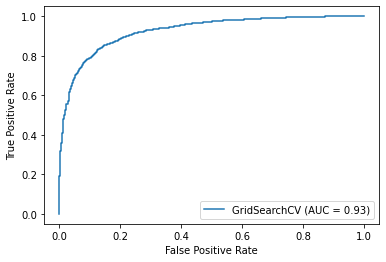

SVC()

Estimator: [{'clf__kernel': ['linear', 'rbf'], 'clf__C': [9, 10]}]
Best params are : {'clf__C': 9, 'clf__kernel': 'rbf'}
Best training accuracy: 0.883
model score: 0.844
[[ 823  448]
 [ 190 4200]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      1271
           1       0.90      0.96      0.93      4390

    accuracy                           0.89      5661
   macro avg       0.86      0.80      0.83      5661
weighted avg       0.88      0.89      0.88      5661

Accuracy Score: 0.887299063769652
F1 Score: 0.9294091613188759
Average precision-recall score: 0.8980688341680481


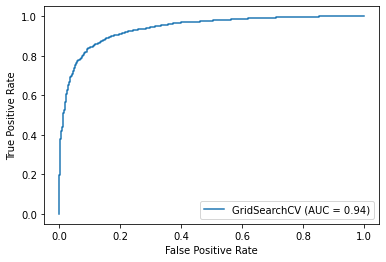

RandomForestClassifier()

Estimator: [{'clf__criterion': ['gini', 'entropy'], 'clf__max_depth': [9, 10], 'clf__min_samples_split': [10]}]
Best params are : {'clf__criterion': 'gini', 'clf__max_depth': 9, 'clf__min_samples_split': 10}
Best training accuracy: 0.769
model score: 0.844
[[   0 1271]
 [   0 4390]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1271
           1       0.78      1.00      0.87      4390

    accuracy                           0.78      5661
   macro avg       0.39      0.50      0.44      5661
weighted avg       0.60      0.78      0.68      5661

Accuracy Score: 0.7754813637166579
F1 Score: 0.8735449209033928
Average precision-recall score: 0.7754813637166579


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


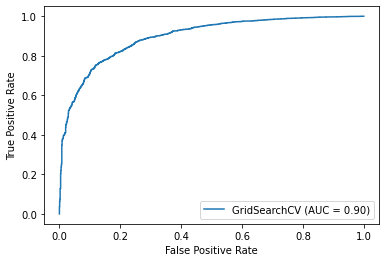


Classifier with best test set accuracy: Support Vector Machine


In [10]:
classifiers = [
    LogisticRegression(),
    svm.SVC(),
    RandomForestClassifier()
    ]

for idx, classifier in enumerate(classifiers): 
    
    pipe = Pipeline(steps=[("word2vec vectorizer", tfidf),
                          ('clf', classifier)])

    out = GridSearchCV(estimator=pipe,
                param_grid=params_dict[idx],
                scoring='accuracy',
                cv=10) 
    
    print(classifier)
    print('\nEstimator: %s' % params_dict[idx])
    
    out.fit(X_train, y_train)
    
    y_pred = out.predict(X_test)
    print('Best params are : %s' % out.best_params_)
    print('Best training accuracy: %.3f' % out.best_score_)
    
    evaluation(y_test, y_pred, X_test, out)
    
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = classifier
        best_clf = idx

print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])      

In [13]:
# Save best grid search pipeline to file
dump_file = 'best_grid_search_pipeline_tfidf.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))


Saved Support Vector Machine grid search pipeline to file: best_grid_search_pipeline_tfidf.pkl


# WHY Word2Vec?

## Limitation of TFIDF
#### TFIDF and BOW do not capture the meaning of word instead considers each word seperately as a feature.
#### Ignores the order of words.
#### Sparse matrix is expensive in terms space and time.
#### It gives more importance to uncommon words.
#### We lose additional information like the semantics, structure, sequence and context around nearby words in each text document.

# What is Word Embedding?

#### Helps computer to understand human language.
#### Consider three sentences:
###        I have top and jeans,   I have beautiful dress,   I love this shop
#### Text Corpus: [I, have, top, and, jeans, beautiful, dress, this, shop]\
##### top = [0, 0, 1, 0, 0, 0, 0, 0, 0]
#### Word embedding is a language modelling technique to represent the words or phrases as a vectors.
#### Word embeddings are dense vector representation for words that are unique for each word and can also capture meaning and how words are related to each other.
#### Word vector representations where words with similar meaning have similar representation.
#### Words with a similar meaning falls in close proximity when projected in the embedding space.
##### Vec("king") - Vec("man") + Vec("woman") = Vec("queen")

![title](img/img1.PNG)

# What is Word2Vec?

#### Proposed by Thomas Mikolov from Google in 2013
#### Neural word embeddings
#### If you have two similar words then their word vectors are also similar in the embedding space.
#### Uses context information to generate the embeddings for the words.
#### It captures a large number of precise syntactic and semantic word relationship.
#### Word2Vec consists of models for generating word embedding. 
#### These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer. 

# Word2Vec utilizes two architectures :

 ## 1. CBOW (Continuous Bag of Words):

#### CBOW model predicts the current word given context words within specific window. 
#### The input layer contains the context words and the output layer contains the current word. 
#### The hidden layer contains the number of dimensions in which we want to represent current word present at the output layer.

![title](img/img4.PNG)

### Consider example: "Sweater is perfect for fall"

![title](img/img2.PNG)

## 2. Skip Gram :

#### Skip gram predicts the surrounding context words within specific window given current word. 
#### The input layer contains the current word and the output layer contains the context words. 
#### The hidden layer contains the number of dimensions in which we want to represent current word present at the input layer.

![title](img/img3.PNG)

## Which model to choose?

#### CBOW is faster than the skipgram and provides better representation for frequent words.
#### Skipgram needs small amount of training data and gives better representation for rare words and phrases, but slower and computationally expensive.

## When to use Word2Vec and when to use TFIDF?

#### When you have extremely small data in that case TFIDF tend to work better than that of Word2Vec.

# Word2vec

In [10]:
df['Review Text w2v']=df['Review Text no Stopwords'].apply(lambda x: tokenize(x))

In [11]:
X1=df['Review Text w2v']
y1=df['Label']

In [248]:
X1.shape

(22642,)

In [12]:
w2v_Y=y1
w2v_X=X1
w2vX_train, w2vX_test, w2vy_train, w2vy_test = train_test_split(w2v_X,w2v_Y, test_size=.20, random_state=101)

In [110]:
model = Word2Vec(X1, size=550, window=10, min_count=1, workers=10, sg=0, iter=200)

In [196]:
print('Vocabulary size:', len(model.wv.vocab))

Vocabulary size: 8250


In [89]:
model.wv['luxurious']

array([-0.6546919 , -3.3104997 ,  5.0338764 , -4.5740123 ,  4.600127  ,
       -0.73620576,  6.065227  ,  0.661671  , -0.3335245 , -3.161598  ,
        2.134943  , -1.302164  , -5.244409  ,  4.9352307 , -2.803048  ,
        0.4057285 , -2.5914207 , -1.1156309 , -0.62633526,  1.9828892 ,
       -2.1706808 ,  1.8603799 , -0.42487136,  3.640757  ,  1.9332893 ,
        2.1121795 ,  0.37853485, -7.8922567 , -0.74926764,  0.2694112 ,
       -0.06892549, -4.0008583 ,  1.3130666 ,  3.3153348 , -0.7297637 ,
        0.1534908 ,  0.3201107 , -4.963672  , -0.5328984 ,  2.0350673 ,
        0.09271318, -0.74220026,  5.471964  ,  0.6411043 ,  3.4064367 ,
       -2.770449  ,  3.171584  ,  3.2953856 ,  1.9021695 , -0.48893186,
       -2.2725437 ,  4.80828   ,  3.841702  ,  0.7804402 , -2.1994636 ,
       -1.8981256 ,  2.576005  ,  0.99047655,  3.2121682 ,  5.072937  ,
        3.9928372 ,  0.7205597 , -1.3859888 ,  0.72283524,  3.5312786 ,
       -0.7919672 , -3.0168295 ,  4.200889  ,  1.6893078 ,  6.35

In [147]:
model.wv['luxurious'].shape

(550,)

In [148]:
model.most_similar('dress')

<ipython-input-148-266171e29a10>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('dress')


[('wedding', 0.3553197383880615),
 ('slip', 0.350614458322525),
 ('jumpsuit', 0.2203442007303238),
 ('skirt', 0.2183971107006073),
 ('bust', 0.21581420302391052),
 ('nipper', 0.21383914351463318),
 ('shirtdress', 0.20785976946353912),
 ('mature', 0.20152635872364044),
 ('byron', 0.19409237802028656),
 ('bodice', 0.18964779376983643)]

In [244]:
model.wv.most_similar(positive=['beautiful', 'bad'], negative=['stunning'])

[('lack', 0.21128255128860474),
 ('industry', 0.17512507736682892),
 ('spending', 0.16459539532661438),
 ('ridiculous', 0.1600225269794464),
 ('unfortunately', 0.15860742330551147),
 ('si', 0.15762566030025482),
 ('huddle', 0.15720415115356445),
 ('wonder', 0.1571725308895111),
 ('puffy', 0.15340861678123474),
 ('much', 0.15220950543880463)]

In [195]:
model.wv.doesnt_match("This sweater is perfect for both summer and winter".split())

'summer'

In [241]:
model.wv.distance('beautiful', 'awful') 

1.024263933300972

In [237]:
model.wv.distance('beautiful', 'stunning') 

0.7428700625896454

In [141]:
similar_words = {search_term: [item[0] for item in model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['top','occasion','dress', 'family', 'color', 'summer', 'beautiful','wear']}
similar_words

{'top': ['shirt', 'louse', 'tank', 'shoulder', 'bar'],
 'occasion': ['compliment', '61', 'exclaim', 'companion', '000'],
 'dress': ['wedding', 'slip', 'jumpsuit', 'skirt', 'bust'],
 'family': ['moving', 'gothic', 'engagement', 'convert', 'antebellum'],
 'color': ['shade', 'print', 'colour', 'white', 'pilcros'],
 'summer': ['weather', 'spark', 'workhouse', 'anyhow', 'official'],
 'beautiful': ['gorgeous', 'love', 'pretty', 'lovely', 'stunning'],
 'wear': ['throw', 'zone', 'retailer', 'sunny', 'looooooove']}

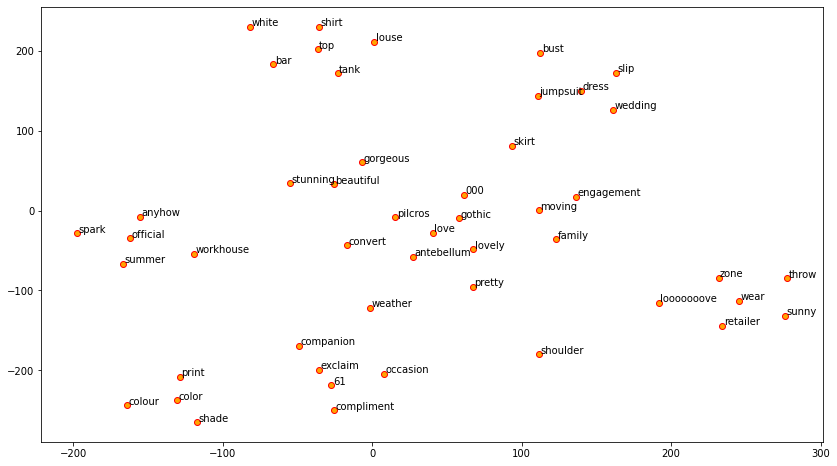

In [235]:
similar_word_represent(similar_words)

## Pipeline for Sentiment Analysis

In [ ]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
       
    def fit(self, X1, y1):
        return self

    def transform(self, X1):
        mean_vec= np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
            for words in X1
        ])
        
        #print(X1.shape)
        print(mean_vec.shape)
        return mean_vec

In [ ]:
classifiers = [
    LogisticRegression(),
    GaussianNB(),
    svm.SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]
f2=[]
for classifier in classifiers:
    print(classifier)
    
    word2vec_pipe = Pipeline(steps=[("word2vec vectorizer", MeanEmbeddingVectorizer(model)),
                      ('classifier', classifier)])
    
    word2vec_pipe.fit(w2vX_train, w2vy_train)  
    
    w2vy_pred = word2vec_pipe.predict(w2vX_test)
    F2 = f1_score(w2vy_test, w2vy_pred)
    f2.append(F2)
    evaluation(w2vy_test, w2vy_pred, w2vX_test, word2vec_pipe)

# With Hyperparameter Tuning

LogisticRegression()

Estimator: [{'clf__penalty': ['l1', 'l2'], 'clf__C': [1.0, 0.5], 'clf__solver': ['liblinear']}]


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(18113,)
(18113, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(4529,)
(4529, 550)
Best params are : {'clf__C': 0.5, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.868
model score: 0.772
[[ 665  366]
 [ 211 3287]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1031
           1       0.90      0.94      0.92      3498

    accuracy                           0.87      4529
   macro avg       0.83      0.79      0.81      4529
weighted avg       0.87      0.87      0.87      4529

Accuracy Score: 0.8725988076838154
F1 Score: 0.9193119843378548
Average precision-recall score: 0.8921204216814189


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(4529,)
(4529, 550)


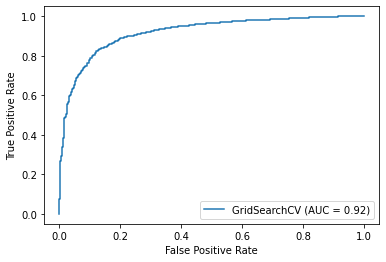

SVC()

Estimator: [{'clf__kernel': ['linear', 'rbf'], 'clf__C': [9, 10]}]


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(18113,)
(18113, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(4529,)
(4529, 550)
Best params are : {'clf__C': 9, 'clf__kernel': 'linear'}
Best training accuracy: 0.868
model score: 0.772
[[ 687  344]
 [ 237 3261]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1031
           1       0.90      0.93      0.92      3498

    accuracy                           0.87      4529
   macro avg       0.82      0.80      0.81      4529
weighted avg       0.87      0.87      0.87      4529

Accuracy Score: 0.8717156105100463
F1 Score: 0.9182035759538224
Average precision-recall score: 0.8956186035323673


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(4529,)
(4529, 550)


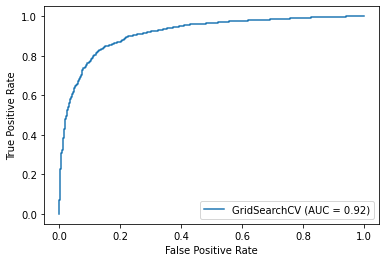

RandomForestClassifier()

Estimator: [{'clf__criterion': ['gini', 'entropy'], 'clf__max_depth': [9, 10], 'clf__min_samples_split': [10]}]


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16301,)
(16301, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1812,)
(1812, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(16302,)
(16302, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(1811,)
(1811, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(18113,)
(18113, 550)


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(4529,)
(4529, 550)
Best params are : {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_split': 10}
Best training accuracy: 0.823
model score: 0.772
[[ 275  756]
 [  52 3446]]
              precision    recall  f1-score   support

           0       0.84      0.27      0.41      1031
           1       0.82      0.99      0.90      3498

    accuracy                           0.82      4529
   macro avg       0.83      0.63      0.65      4529
weighted avg       0.82      0.82      0.78      4529

Accuracy Score: 0.8215941708986532
F1 Score: 0.8950649350649351
Average precision-recall score: 0.8193761404009233


<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-34-72bfc365a3f2>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


(4529,)
(4529, 550)


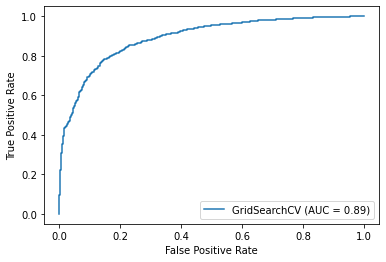


Classifier with best test set accuracy: Support Vector Machine


In [36]:
classifiers = [
    LogisticRegression(),
    svm.SVC(),
    RandomForestClassifier()
    ]

for idx, classifier in enumerate(classifiers): 
    
    pipe1 = Pipeline(steps=[('preprocessor', MeanEmbeddingVectorizer(model)),
                          ('clf', classifier)])

    out1 = GridSearchCV(estimator=pipe1,
                param_grid=params_dict[idx],
                scoring='accuracy',
                cv=10) 
    
    print(classifier)
    print('\nEstimator: %s' % params_dict[idx])
    
    out1.fit(w2vX_train, w2vy_train)
    
    w2vy_pred = out1.predict(w2vX_test)
    print('Best params are : %s' % out1.best_params_)
    print('Best training accuracy: %.3f' % out1.best_score_)
    
    evaluation(w2vy_test, w2vy_pred, w2vX_test, out1)
    
    if accuracy_score(w2vy_test, w2vy_pred) > best_acc:
        best_acc = accuracy_score(w2vy_test, w2vy_pred)
        best_gs = classifier
        best_clf = idx

print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])      

In [37]:
# Save best grid search pipeline to file
dump_file = 'best_grid_search_pipeline_word2vec.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))


Saved Support Vector Machine grid search pipeline to file: best_grid_search_pipeline_word2vec.pkl


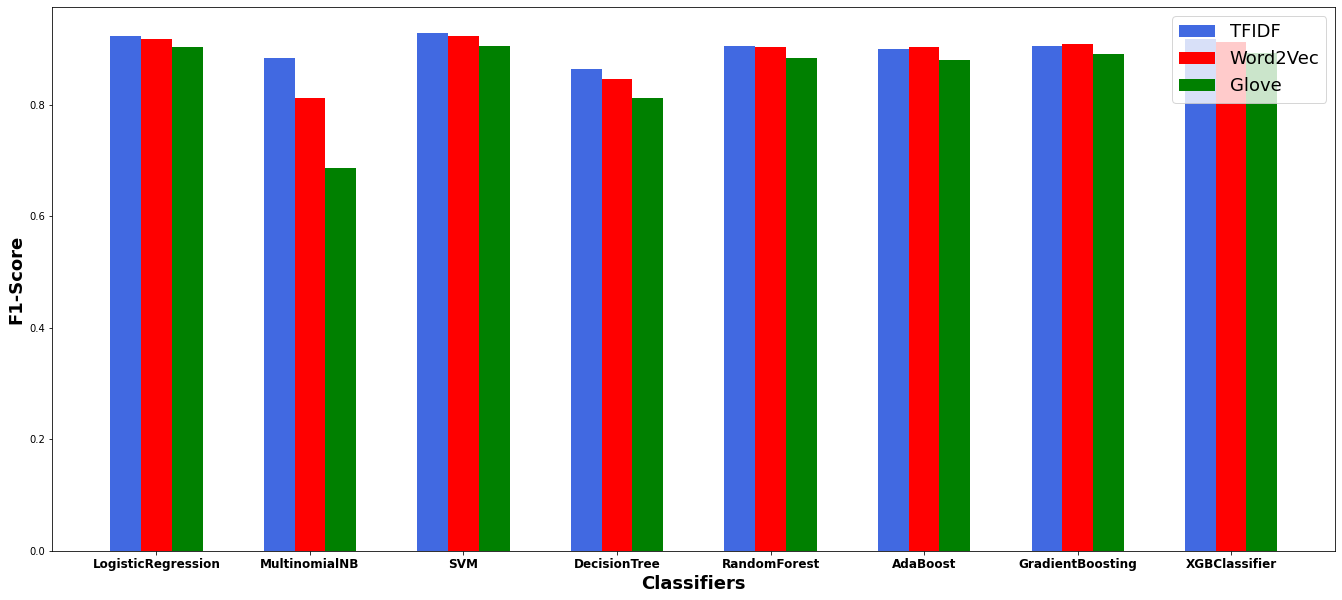

In [142]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(23, 10)) 
   
# set height of bar 
y1 = [0.9236133812792852,
 0.8835381825508765,
 0.9282894736842104,
 0.8639175257731958,
 0.9057872072261317,
 0.8996677740863789,
 0.9058898847631243,
 0.9183222958057395]
y2 = [0.9185558354324098,
 0.8123577235772357,
 0.9237630662020906,
 0.8455565142364107,
 0.9035723878592533,
 0.9038461538461539,
 0.9080856945404284,
 0.9123732814886821]
y3 = [0.9031693989071039,
0.686041637557636,
0.9044859411890963,
0.8124423963133641,
0.8831301853938339,
0.8808459609724191,
0.8906779661016949,
0.8929656969170647
        ] 
   
# create data 
x = np.arange(8) 
width = 0.2
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, y1, width, color='royalblue') 
plt.bar(x, y2, width, color='red') 
plt.bar(x+0.2, y3, width, color='green') 

plt.xticks(x, ['LogisticRegression',
    'MultinomialNB',
    'SVM',
    'DecisionTree',
    'RandomForest',
    'AdaBoost',
    'GradientBoosting',
    'XGBClassifier'], fontsize=12, fontweight ='bold') 
plt.xlabel("Classifiers", fontsize=18, fontweight ='bold') 
plt.ylabel("F1-Score", fontsize=18, fontweight ='bold') 
plt.legend(["TFIDF", "Word2Vec", "Glove"], fontsize=18) 
plt.show() 

# Glove 

In [38]:
X2, y2 = df['Review Text no Stopwords'], df['Label']
gX_train, gX_test, gy_train, gy_test = train_test_split(X2, y2, random_state=42)

In [39]:
%%time
glove_vectors = dict()
file = open('C:/Users/anagha.bhople/Desktop/Sentiment Analysis/GloVe Word Embedding/glove/glove.6B.300d.txt', encoding='utf-8')

for line in file:
    values = line.split()
    
    word  = values[0]
    vectors = np.asarray(values[1:])
    glove_vectors[word] = vectors
    
file.close()

Wall time: 1min 23s


In [43]:
class glove(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        global arr 
        arr= np.zeros(300)

    def fit(self, X2, y2):
        return self
    
    def get_vec(self, X2):
        arr = np.zeros(300)
        text = str(X2).split()

        for t in text:
            #print(t)
            try:
                vec = self.word2vec.get(t).astype(float)
                arr = arr + vec
            except:
                pass
        arr = arr.reshape(1, -1)[0]
        #print(arr.shape)
        return arr/len(text)


    def transform(self, X2):
        lis=np.array(X2.apply(lambda x: self.get_vec(x)))
        #print(lis.shape)
        lis = lis.reshape(1, -1)[0]
        lis = np.concatenate(lis, axis = 0).reshape(-1, 300)
        #print(lis.shape)
        return lis
       

LogisticRegression()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model score: 0.869
[[ 643  628]
 [ 258 4132]]
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      1271
           1       0.87      0.94      0.90      4390

    accuracy                           0.84      5661
   macro avg       0.79      0.72      0.75      5661
weighted avg       0.83      0.84      0.83      5661

Accuracy Score: 0.8434905493729024
F1 Score: 0.9031693989071039
Average precision-recall score: 0.8626259620390667


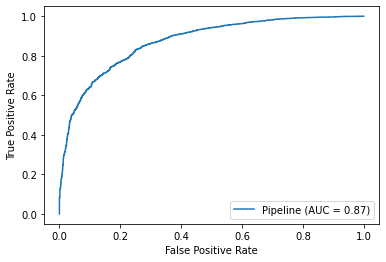

GaussianNB()
model score: 0.869
[[ 959  312]
 [1935 2455]]
              precision    recall  f1-score   support

           0       0.33      0.75      0.46      1271
           1       0.89      0.56      0.69      4390

    accuracy                           0.60      5661
   macro avg       0.61      0.66      0.57      5661
weighted avg       0.76      0.60      0.64      5661

Accuracy Score: 0.6030736618971914
F1 Score: 0.686041637557636
Average precision-recall score: 0.8379810429407379


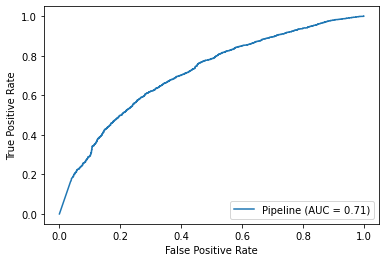

SVC()
model score: 0.869
[[ 557  714]
 [ 176 4214]]
              precision    recall  f1-score   support

           0       0.76      0.44      0.56      1271
           1       0.86      0.96      0.90      4390

    accuracy                           0.84      5661
   macro avg       0.81      0.70      0.73      5661
weighted avg       0.83      0.84      0.83      5661

Accuracy Score: 0.8427839604310192
F1 Score: 0.9044859411890963
Average precision-recall score: 0.8519210896698166


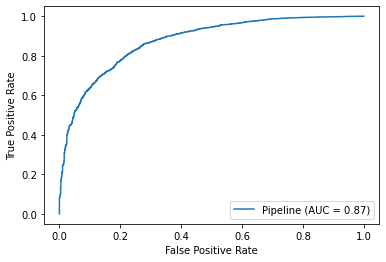

DecisionTreeClassifier()
model score: 0.869
[[ 507  764]
 [ 864 3526]]
              precision    recall  f1-score   support

           0       0.37      0.40      0.38      1271
           1       0.82      0.80      0.81      4390

    accuracy                           0.71      5661
   macro avg       0.60      0.60      0.60      5661
weighted avg       0.72      0.71      0.72      5661

Accuracy Score: 0.7124183006535948
F1 Score: 0.8124423963133641
Average precision-recall score: 0.8127734787951859


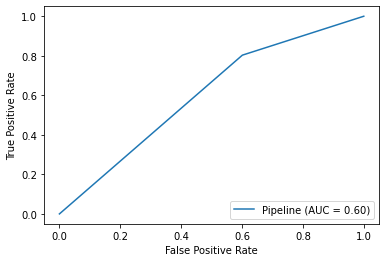

RandomForestClassifier()
model score: 0.869
[[ 209 1062]
 [  79 4311]]
              precision    recall  f1-score   support

           0       0.73      0.16      0.27      1271
           1       0.80      0.98      0.88      4390

    accuracy                           0.80      5661
   macro avg       0.76      0.57      0.58      5661
weighted avg       0.79      0.80      0.75      5661

Accuracy Score: 0.7984455043278572
F1 Score: 0.8831301853938339
Average precision-recall score: 0.801861634503943


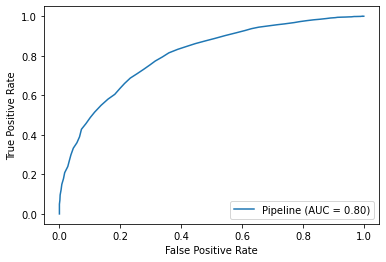

AdaBoostClassifier()
model score: 0.869
[[ 528  743]
 [ 350 4040]]
              precision    recall  f1-score   support

           0       0.60      0.42      0.49      1271
           1       0.84      0.92      0.88      4390

    accuracy                           0.81      5661
   macro avg       0.72      0.67      0.69      5661
weighted avg       0.79      0.81      0.79      5661

Accuracy Score: 0.806924571630454
F1 Score: 0.8808459609724191
Average precision-recall score: 0.8391429296588035


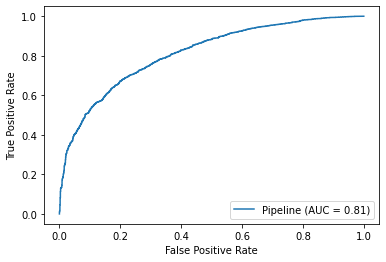

GradientBoostingClassifier()
model score: 0.869
[[ 425  846]
 [ 186 4204]]
              precision    recall  f1-score   support

           0       0.70      0.33      0.45      1271
           1       0.83      0.96      0.89      4390

    accuracy                           0.82      5661
   macro avg       0.76      0.65      0.67      5661
weighted avg       0.80      0.82      0.79      5661

Accuracy Score: 0.8177000529941706
F1 Score: 0.8906779661016949
Average precision-recall score: 0.8300604724932478


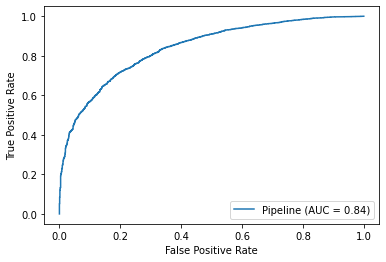

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


C:\Users\anagha.bhople\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model score: 0.869
[[ 562  709]
 [ 277 4113]]
              precision    recall  f1-score   support

           0       0.67      0.44      0.53      1271
           1       0.85      0.94      0.89      4390

    accuracy                           0.83      5661
   macro avg       0.76      0.69      0.71      5661
weighted avg       0.81      0.83      0.81      5661

Accuracy Score: 0.8258258258258259
F1 Score: 0.8929656969170647
Average precision-recall score: 0.8480764796045912


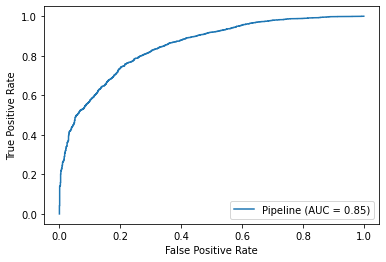

In [59]:
classifiers = [
    LogisticRegression(),
    GaussianNB(),
    svm.SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]

for classifier in classifiers:
    print(classifier)
    
    glove_pipe = Pipeline([
    ("glove vectorizer", glove(glove_vectors)),
    ('classifier', classifier)])
    
    glove_pipe.fit(gX_train, gy_train)   
    
    gy_pred = glove_pipe.predict(gX_test)
    evaluation(gy_test, gy_pred, gX_test, glove_pipe)

# Hyperparameter Tuning

In [45]:
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

Log = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 

SVC = [{'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

RF = [{'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

params_dict = {0: Log, 1: SVC, 2: RF}

grid_dict = {0: 'Logistic Regression', 
             1: 'Support Vector Machine',
             2: 'Random Forest Classifier'}

best_acc = 0.0
best_clf = 0
best_gs = ''

LogisticRegression()

Estimator: [{'clf__penalty': ['l1', 'l2'], 'clf__C': [1.0, 0.5], 'clf__solver': ['liblinear']}]
Best params are : {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.839
model score: 0.844
[[ 670  601]
 [ 270 4120]]
              precision    recall  f1-score   support

           0       0.71      0.53      0.61      1271
           1       0.87      0.94      0.90      4390

    accuracy                           0.85      5661
   macro avg       0.79      0.73      0.76      5661
weighted avg       0.84      0.85      0.84      5661

Accuracy Score: 0.8461402579049638
F1 Score: 0.9044012731862584
Average precision-recall score: 0.8667174018616337


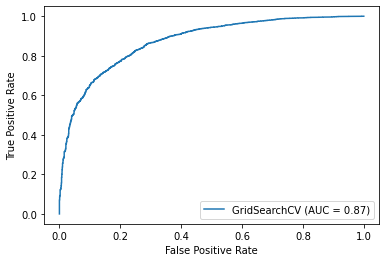

SVC()

Estimator: [{'clf__kernel': ['linear', 'rbf'], 'clf__C': [9, 10]}]
Best params are : {'clf__C': 10, 'clf__kernel': 'rbf'}
Best training accuracy: 0.847
model score: 0.844
[[ 710  561]
 [ 260 4130]]
              precision    recall  f1-score   support

           0       0.73      0.56      0.63      1271
           1       0.88      0.94      0.91      4390

    accuracy                           0.85      5661
   macro avg       0.81      0.75      0.77      5661
weighted avg       0.85      0.85      0.85      5661

Accuracy Score: 0.854972619678502
F1 Score: 0.9095914546856074
Average precision-recall score: 0.8741948839206303


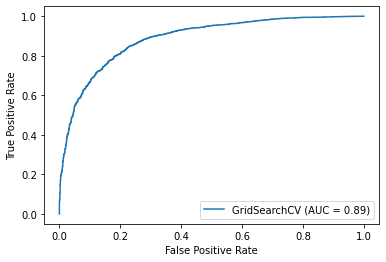

RandomForestClassifier()

Estimator: [{'clf__criterion': ['gini', 'entropy'], 'clf__max_depth': [9, 10], 'clf__min_samples_split': [10]}]
Best params are : {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_split': 10}
Best training accuracy: 0.787
model score: 0.844
[[ 121 1150]
 [  31 4359]]
              precision    recall  f1-score   support

           0       0.80      0.10      0.17      1271
           1       0.79      0.99      0.88      4390

    accuracy                           0.79      5661
   macro avg       0.79      0.54      0.53      5661
weighted avg       0.79      0.79      0.72      5661

Accuracy Score: 0.7913796149090266
F1 Score: 0.8806950196989595
Average precision-recall score: 0.7911393256185123


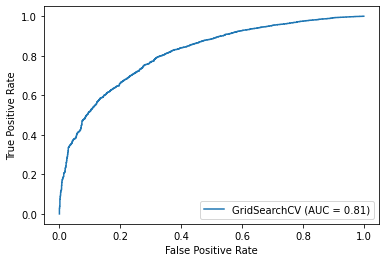


Classifier with best test set accuracy: Support Vector Machine


In [46]:
classifiers = [
    LogisticRegression(),
    svm.SVC(),
    RandomForestClassifier()
    ]

for idx, classifier in enumerate(classifiers): 
    
    pipe2 = Pipeline(steps=[("glove vectorizer", glove(glove_vectors)),
                          ('clf', classifier)])

    out2 = GridSearchCV(estimator=pipe2,
                param_grid=params_dict[idx],
                scoring='accuracy',
                cv=10) 
    
    print(classifier)
    print('\nEstimator: %s' % params_dict[idx])
    
    out2.fit(gX_train, gy_train)
    
    gy_pred = out2.predict(gX_test)
    print('Best params are : %s' % out2.best_params_)
    print('Best training accuracy: %.3f' % out2.best_score_)
    
    evaluation(gy_test, gy_pred, gX_test, out2)
    
    if accuracy_score(gy_test, gy_pred) > best_acc:
        best_acc = accuracy_score(gy_test, gy_pred)
        best_gs = classifier
        best_clf = idx

print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])      

In [47]:
# Save best grid search pipeline to file
dump_file = 'best_grid_search_pipeline_glove.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))


Saved Support Vector Machine grid search pipeline to file: best_grid_search_pipeline_glove.pkl


# FastText

In [64]:
df['Review Text fast']=df['Review Text no Stopwords'].apply(lambda x: tokenize(x))

In [65]:
X3=df['Review Text fast']
y3=df['Label']

In [66]:
f_Y=y3
f_X=X3
fX_train, fX_test, fy_train, fy_test = train_test_split(f_X,f_Y, test_size=.20, random_state=101)

In [70]:
class FastTextVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
       
    def fit(self, X3, y3):
        return self

    def transform(self, X3):
        mean_vec= np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
            for words in X3
        ])
        
        #print(X1.shape)
        #print(mean_vec)
        return mean_vec

In [71]:
# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 50          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

# sg decides whether to use the skip-gram model (1) or CBOW (0)
ft_model = FastText(df['Review Text fast'], size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=1, iter=50)

LogisticRegression()


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


model score: 0.772
[[ 620  411]
 [ 193 3305]]
              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1031
           1       0.89      0.94      0.92      3498

    accuracy                           0.87      4529
   macro avg       0.83      0.77      0.79      4529
weighted avg       0.86      0.87      0.86      4529

Accuracy Score: 0.8666372267608744
F1 Score: 0.9162739118380926
Average precision-recall score: 0.8829395210011679


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


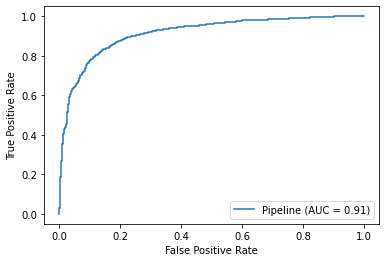

GaussianNB()


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


model score: 0.772
[[ 822  209]
 [ 616 2882]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67      1031
           1       0.93      0.82      0.87      3498

    accuracy                           0.82      4529
   macro avg       0.75      0.81      0.77      4529
weighted avg       0.85      0.82      0.83      4529

Accuracy Score: 0.8178405829101347
F1 Score: 0.8747913188647747
Average precision-recall score: 0.9042032374299196


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


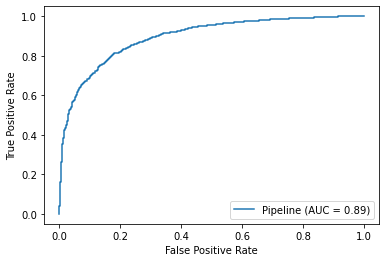

SVC()


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


model score: 0.772
[[ 659  372]
 [ 209 3289]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69      1031
           1       0.90      0.94      0.92      3498

    accuracy                           0.87      4529
   macro avg       0.83      0.79      0.81      4529
weighted avg       0.87      0.87      0.87      4529

Accuracy Score: 0.8717156105100463
F1 Score: 0.9188434138846208
Average precision-recall score: 0.8908581753514614


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


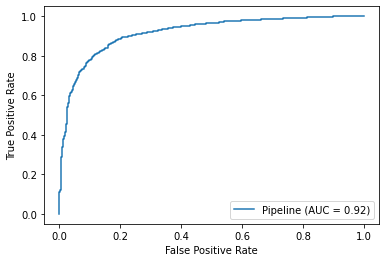

DecisionTreeClassifier()


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


model score: 0.772
[[ 536  495]
 [ 559 2939]]
              precision    recall  f1-score   support

           0       0.49      0.52      0.50      1031
           1       0.86      0.84      0.85      3498

    accuracy                           0.77      4529
   macro avg       0.67      0.68      0.68      4529
weighted avg       0.77      0.77      0.77      4529

Accuracy Score: 0.7672775447118569
F1 Score: 0.8479515291402193
Average precision-recall score: 0.8425098953632346


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


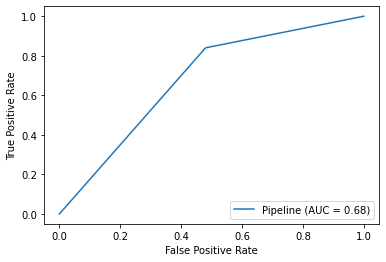

RandomForestClassifier()


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


model score: 0.772
[[ 503  528]
 [ 155 3343]]
              precision    recall  f1-score   support

           0       0.76      0.49      0.60      1031
           1       0.86      0.96      0.91      3498

    accuracy                           0.85      4529
   macro avg       0.81      0.72      0.75      4529
weighted avg       0.84      0.85      0.84      4529

Accuracy Score: 0.8491940825789357
F1 Score: 0.9073144252951554
Average precision-recall score: 0.8595579670544484


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


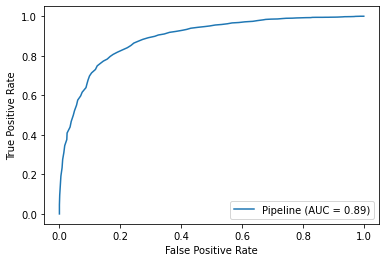

AdaBoostClassifier()


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


model score: 0.772
[[ 613  418]
 [ 276 3222]]
              precision    recall  f1-score   support

           0       0.69      0.59      0.64      1031
           1       0.89      0.92      0.90      3498

    accuracy                           0.85      4529
   macro avg       0.79      0.76      0.77      4529
weighted avg       0.84      0.85      0.84      4529

Accuracy Score: 0.8467652903510708
F1 Score: 0.902773886242645
Average precision-recall score: 0.8762639608794576


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


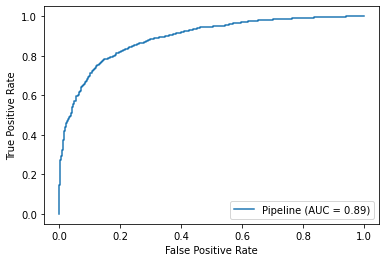

GradientBoostingClassifier()


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


model score: 0.772
[[ 593  438]
 [ 220 3278]]
              precision    recall  f1-score   support

           0       0.73      0.58      0.64      1031
           1       0.88      0.94      0.91      3498

    accuracy                           0.85      4529
   macro avg       0.81      0.76      0.78      4529
weighted avg       0.85      0.85      0.85      4529

Accuracy Score: 0.8547140649149922
F1 Score: 0.908788466869975
Average precision-recall score: 0.8752272110770556


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)


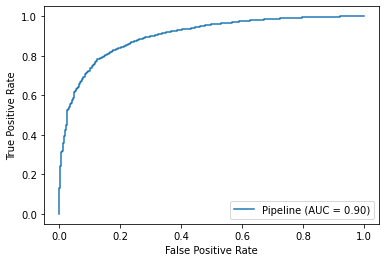

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
<ipython-input-70-874e11944aae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis=0)
C:\Users\anagha.bhople\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model score: 0.772
[[ 636  395]
 [ 231 3267]]
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1031
           1       0.89      0.93      0.91      3498

    accuracy                           0.86      4529
   macro avg       0.81      0.78      0.79      4529
weighted avg       0.86      0.86      0.86      4529

Accuracy Score: 0.8617796423051446
F1 Score: 0.9125698324022347
Average precision-recall score: 0.8842254770312388


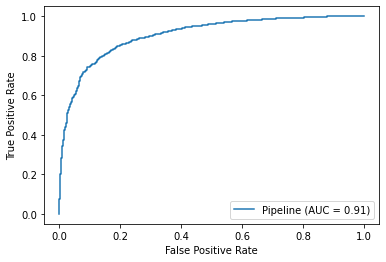

In [73]:
classifiers = [
    LogisticRegression(),
    GaussianNB(),
    svm.SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]

for classifier in classifiers:
    print(classifier)
    
    fast_pipe = Pipeline(steps=[("word2vec vectorizer", FastTextVectorizer(ft_model)),
                      ('classifier', classifier)])
    
    fast_pipe.fit(fX_train, fy_train)  
    
    fy_pred = fast_pipe.predict(fX_test)
    evaluation(fy_test, fy_pred, fX_test, fast_pipe)

In [ ]:
classifiers = [
    LogisticRegression(),
    svm.SVC(),
    RandomForestClassifier()
    ]

for idx, classifier in enumerate(classifiers): 
    
    pipe3 = Pipeline(steps=[('preprocessor', FastTextVectorizer(ft_model)),
                          ('clf', classifier)])

    out3 = GridSearchCV(estimator=pipe3,
                param_grid=params_dict[idx],
                scoring='accuracy',
                cv=10) 
    
    print(classifier)
    print('\nEstimator: %s' % params_dict[idx])
    
    out3.fit(fX_train, fy_train)
    
    w2vy_pred = out3.predict(fX_test)
    print('Best params are : %s' % out3.best_params_)
    print('Best training accuracy: %.3f' % out3.best_score_)
    
    evaluation(fy_test, fy_pred, fX_test, out3)
    
    if accuracy_score(fy_test, fy_pred) > best_acc:
        best_acc = accuracy_score(fy_test, fy_pred)
        best_gs = classifier
        best_clf = idx

print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])      

In [ ]:
# Save best grid search pipeline to file
dump_file = 'best_grid_search_pipeline_fasttext.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))